<a href="https://colab.research.google.com/github/Vai5h/NLP-IIIT/blob/main/Assignment_2(Task_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.io import wavfile

# Provide the path to the audio file
filename = '/content/i am name.wav'

# Use wavfile.read to read the audio file
fs, audio = wavfile.read(filename)

# Display some information about the audio
print(f'Audio Duration: {len(audio) / fs} seconds')
print(f'Sampling Rate: {fs} Hz')

# You can now work with the 'audio' variable containing the audio data


Audio Duration: 2.6875 seconds
Sampling Rate: 48000 Hz


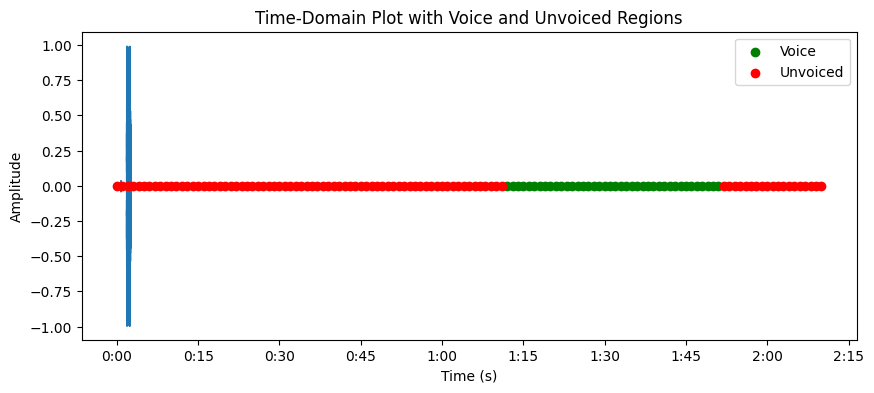

In [ ]:
#1. Create a time-domain plot with voiced and unvoiced regions marked

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
audio_path = "name.wav"
y, sr = librosa.load(audio_path)

# Compute the short-time energy
energy = librosa.feature.rms(y=y)[0]

# Set a threshold to distinguish between voice and unvoiced regions
threshold = 0.01

# Mark voice and unvoiced regions
voice_regions = np.where(energy > threshold)[0]
unvoiced_regions = np.where(energy <= threshold)[0]

# Plot the time-domain signal
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Time-Domain Plot with Voice and Unvoiced Regions')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Mark voice regions in green and unvoiced regions in red
plt.scatter(voice_regions, y[voice_regions], color='g', label='Voice')
plt.scatter(unvoiced_regions, y[unvoiced_regions], color='r', label='Unvoiced')

plt.legend()
plt.show()


Highest Pitch Frequency: 22050.00 Hz
Lowest Pitch Frequency: 3675.00 Hz


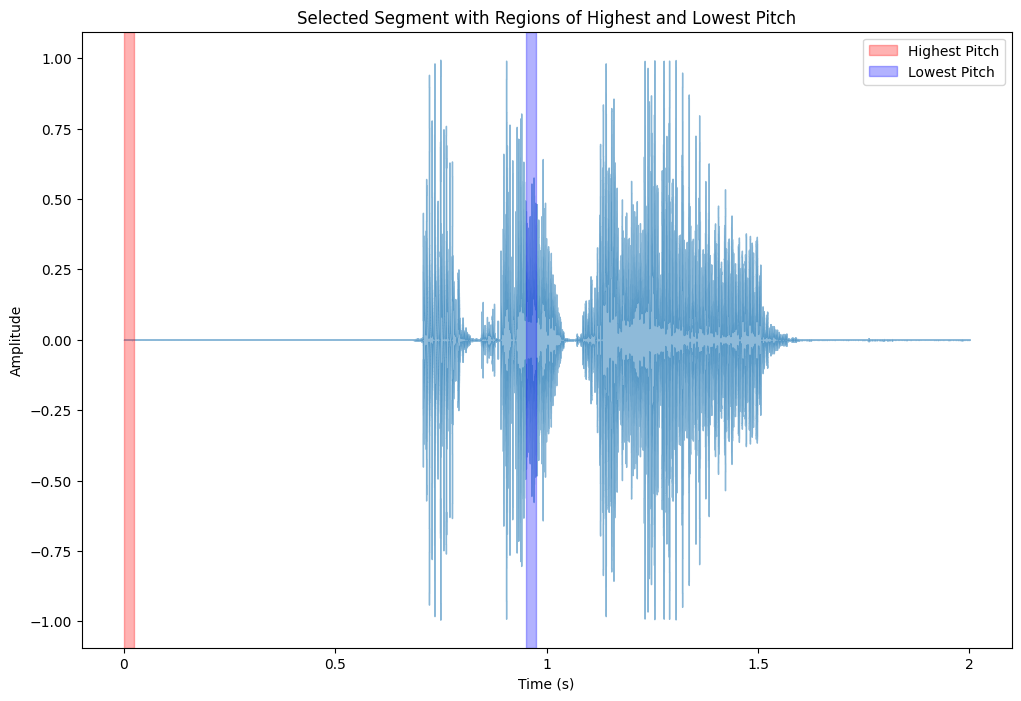

In [ ]:
#2. In the time-domain plot, mark the regions where the pitch is the highest and the lowest.What are the pitch frequencies in those regions?

# Define the start and end time of the segment in seconds
start_time = 1.0
end_time = 3.0

# Extract the selected segment
selected_segment = y[int(start_time * sr):int(end_time * sr)]

# Function to calculate autocorrelation
def autocorrelation(signal):
    auto_corr = np.correlate(signal, signal, mode='full')
    return auto_corr[len(auto_corr)//2:]

# Function to estimate pitch from autocorrelation
def estimate_pitch(signal, sr):
    auto_corr = autocorrelation(signal)
    # Exclude the first peak (which is the signal correlated with itself)
    auto_corr[0] = 0
    # Find the index of the maximum peak
    max_peak_index = np.argmax(auto_corr)
    # Calculate pitch frequency (in Hz) using the sampling rate
    pitch_frequency = sr / max_peak_index
    return pitch_frequency

# Calculate pitch for each window in the selected segment
window_size = 1024
hop_size = 512
num_windows = int((len(selected_segment) - window_size) / hop_size) + 1
pitch_values = np.zeros(num_windows)

for i in range(num_windows):
    window_start = i * hop_size
    window_end = window_start + window_size
    pitch_values[i] = estimate_pitch(selected_segment[window_start:window_end], sr)

# Find the index of the highest and lowest pitch values
highest_pitch_index = np.argmax(pitch_values)
lowest_pitch_index = np.argmin(pitch_values)

# Print pitch values in Hz
highest_pitch_frequency = pitch_values[highest_pitch_index]
lowest_pitch_frequency = pitch_values[lowest_pitch_index]
print(f"Highest Pitch Frequency: {highest_pitch_frequency:.2f} Hz")
print(f"Lowest Pitch Frequency: {lowest_pitch_frequency:.2f} Hz")

# Plot the selected segment with regions of highest and lowest pitch
plt.figure(figsize=(12, 8))

# Plot the audio signal
librosa.display.waveshow(selected_segment, sr=sr, alpha=0.5)

# Mark the region with the highest pitch in red
plt.axvspan(highest_pitch_index * hop_size / sr, (highest_pitch_index + 1) * hop_size / sr, color='red', alpha=0.3, label='Highest Pitch')

# Mark the region with the lowest pitch in blue
plt.axvspan(lowest_pitch_index * hop_size / sr, (lowest_pitch_index + 1) * hop_size / sr, color='blue', alpha=0.3, label='Lowest Pitch')

plt.title('Selected Segment with Regions of Highest and Lowest Pitch')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
#3. What is the fundamental frequency (pitch) in your particular case?

print("Pitch Values (in Hz):\n", pitch_values)
fundamental_frequency = np.mean(pitch_values)
print("----------------------------------------------------------------------------------")
print(f'Fundamental Frequency: {fundamental_frequency} Hz')

Pitch Values (in Hz):
 [22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050.
 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050.
 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050.
 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050.
 22050.  3675.  3675.  7350.  3675. 22050. 22050. 22050. 22050. 22050.
 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050.
 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050. 22050.  7350.
  7350.  7350.  7350.  7350.  7350.  7350.  7350.  7350.  7350. 22050.
  7350. 22050. 22050. 22050. 22050.]
----------------------------------------------------------------------------------
Fundamental Frequency: 19326.176470588234 Hz


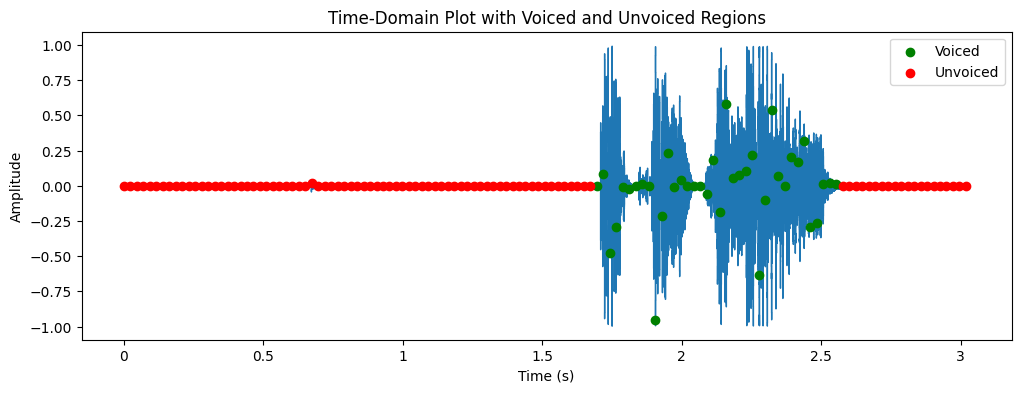

Frame at 1.5 seconds is likely an unvoiced region.


In [ ]:
#4. Identify a voiced regions and unvoiced regions in a signal and for one particular frame,compute of frame energy and comment of it

# Set parameters for energy computation
frame_length = 1024
hop_length = 512

# Compute short-time energy
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length, center=True, pad_mode='reflect')[0]


# Set a threshold to distinguish between voiced and unvoiced regions
threshold = 0.01

# Identify voiced and unvoiced regions based on energy
voiced_regions = np.where(energy > threshold)[0]
unvoiced_regions = np.where(energy <= threshold)[0]

# Plot the time-domain signal
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Time-Domain Plot with Voiced and Unvoiced Regions')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Mark voiced regions in green and unvoiced regions in red
plt.scatter(voiced_regions * hop_length / sr, y[voiced_regions * hop_length], color='g', label='Voiced')
plt.scatter(unvoiced_regions * hop_length / sr, y[unvoiced_regions * hop_length], color='r', label='Unvoiced')

plt.legend()
plt.show()

# Choose a particular frame to compute energy (e.g., at 1.5 seconds)
frame_time = 1.5
frame_index = int(frame_time * sr / hop_length)
frame_start = frame_index * hop_length
frame_end = (frame_index + 1) * hop_length

# Compute energy for the selected frame
frame_energy = np.sum(y[frame_start:frame_end] ** 2)

# Comment on the frame energy
if frame_energy > threshold:
    print(f"Frame at {frame_time} seconds is likely a voiced region.")
else:
    print(f"Frame at {frame_time} seconds is likely an unvoiced region.")


In [ ]:
#5. Implement zero-crossings and comment of it.

import numpy as np
from scipy.io import wavfile

# Load the WAV file
file_path = 'name.wav'
sample_rate, audio_data = wavfile.read(file_path)

# Ensure mono audio (convert to mono if stereo)
if len(audio_data.shape) > 1:
    audio_data = np.mean(audio_data, axis=1)

# Calculate zero-crossings
zero_crossings = np.where(np.diff(np.sign(audio_data)))[0]

# Print the number of zero-crossings
num_zero_crossings = len(zero_crossings)
print(f"Number of zero-crossings: {num_zero_crossings}")

# Calculate and print the zero-crossing rate (zero-crossings per second)
duration = len(audio_data) / sample_rate
zero_crossing_rate = num_zero_crossings / duration
print(f"Zero-crossing rate: {zero_crossing_rate} crossings/second")


Number of zero-crossings: 22164
Zero-crossing rate: 7311.835051546392 crossings/second


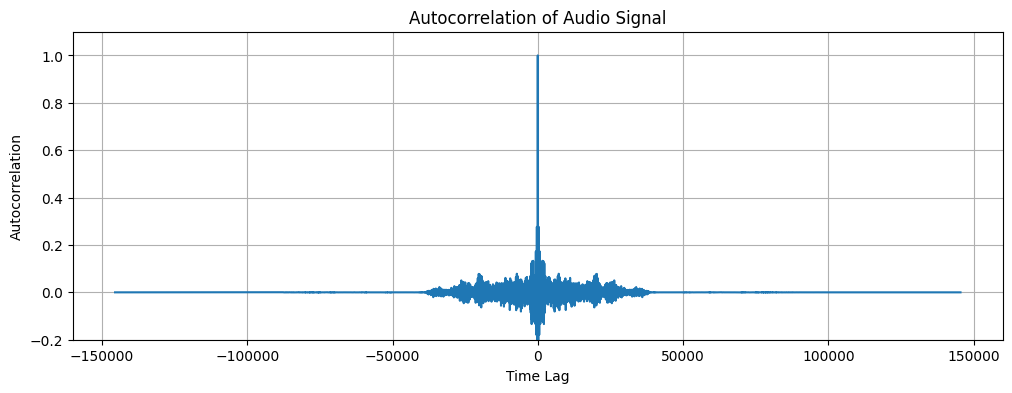

Autocorrelation at lag 1000: 102702554824.0000


In [ ]:
#6. Autocorrelation and comment of it.

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the WAV file
file_path = 'name.wav'
sample_rate, audio_data = wavfile.read(file_path)

# Ensure mono audio (convert to mono if stereo)
if len(audio_data.shape) > 1:
    audio_data = np.mean(audio_data, axis=1)

# Calculate autocorrelation
autocorr = np.correlate(audio_data, audio_data, mode='full')

# Normalize autocorrelation values
autocorr /= np.max(np.abs(autocorr))

# Plot the autocorrelation
plt.figure(figsize=(12, 4))

# Plot the autocorrelation curve without the text annotation
plt.plot(np.arange(-len(audio_data) + 1, len(audio_data)), autocorr)

# Choose the lag for which you want to calculate the autocorrelation
lag = 1000

# Calculate autocorrelation at the specified lag
autocorr_value = np.correlate(audio_data[:-lag], audio_data[lag:], mode='valid')[0]



plt.title('Autocorrelation of Audio Signal')
plt.xlabel('Time Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.ylim(-0.2, 1.1)  # Adjust y-axis limits to accommodate text
plt.show()
print(f'Autocorrelation at lag {lag}: {autocorr_value:.4f}')